# Import Libs

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

# Load data

In [2]:
url_to_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [3]:
df_orig = pd.read_csv(url_to_covid)

# Understand structure

In [4]:
df_orig.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [5]:
df = df_orig[df_orig.location == 'Austria']

In [6]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
7230,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7231,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7232,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7233,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7234,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,AUT,Europe,Austria,2021-10-20,783996.0,3727.0,2493.429,11209.0,13.0,10.571,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7834,AUT,Europe,Austria,2021-10-21,787644.0,3648.0,2704.714,11220.0,11.0,11.000,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7835,AUT,Europe,Austria,2021-10-22,791226.0,3582.0,2869.000,11233.0,13.0,11.714,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
7836,AUT,Europe,Austria,2021-10-23,794982.0,3756.0,3063.143,11245.0,12.0,12.000,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN


/home/alex/anaconda3/envs/covid-venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


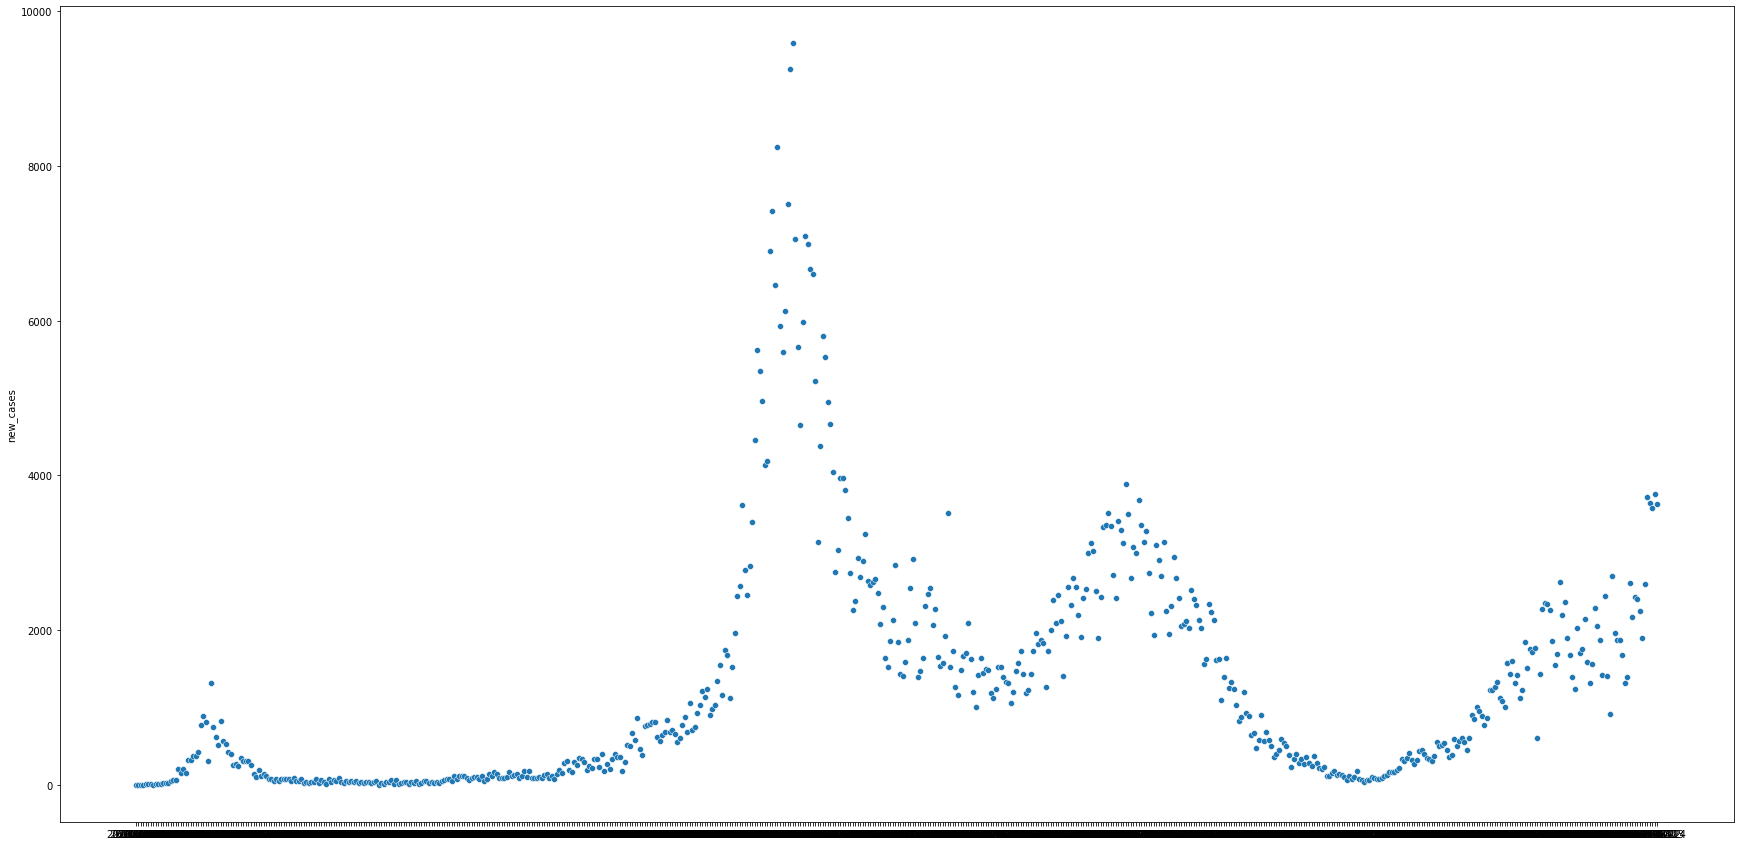

In [7]:
_ = plt.figure(figsize=(30, 15))
sns.scatterplot(sorted(df.date), df.new_cases);

## Check missing

In [8]:
df = df_orig.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125965 entries, 0 to 125964
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 125965 non-null  object 
 1   continent                                120261 non-null  object 
 2   location                                 125965 non-null  object 
 3   date                                     125965 non-null  object 
 4   total_cases                              119154 non-null  float64
 5   new_cases                                119150 non-null  float64
 6   new_cases_smoothed                       118136 non-null  float64
 7   total_deaths                             108218 non-null  float64
 8   new_deaths                               108371 non-null  float64
 9   new_deaths_smoothed                      118136 non-null  float64
 10  total_cases_per_million         

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
weekly_icu_admissions_per_million,weekly_icu_admissions_per_million,98.972731
weekly_icu_admissions,weekly_icu_admissions,98.972731
weekly_hosp_admissions_per_million,weekly_hosp_admissions_per_million,98.205851
weekly_hosp_admissions,weekly_hosp_admissions,98.205851
total_boosters_per_hundred,total_boosters_per_hundred,96.593498
...,...,...
continent,continent,4.528242
population,population,0.720835
date,date,0.000000
location,location,0.000000


In [11]:
cols_too_many_missing = missing_value_df[missing_value_df.percent_missing > 50].index.tolist()
len(cols_too_many_missing)
cols_too_many_missing

30

['weekly_icu_admissions_per_million',
 'weekly_icu_admissions',
 'weekly_hosp_admissions_per_million',
 'weekly_hosp_admissions',
 'total_boosters_per_hundred',
 'total_boosters',
 'excess_mortality_cumulative_per_million',
 'excess_mortality',
 'excess_mortality_cumulative',
 'excess_mortality_cumulative_absolute',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'hosp_patients',
 'new_vaccinations',
 'people_fully_vaccinated',
 'people_fully_vaccinated_per_hundred',
 'people_vaccinated',
 'people_vaccinated_per_hundred',
 'total_vaccinations',
 'total_vaccinations_per_hundred',
 'new_tests_per_thousand',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_vaccinations_smoothed',
 'new_vaccinations_smoothed_per_million',
 'handwashing_facilities',
 'tests_per_case',
 'positive_rate']

In [12]:
len(df.columns)

65

In [13]:
df_reduced = df.drop(columns=cols_too_many_missing)

In [14]:
len(df_reduced.columns)

35

In [15]:
df_reduced

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125960,ZWE,Africa,Zimbabwe,2021-10-20,132437.0,32.0,47.000,4659.0,0.0,1.571,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125961,ZWE,Africa,Zimbabwe,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125962,ZWE,Africa,Zimbabwe,2021-10-22,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125963,ZWE,Africa,Zimbabwe,2021-10-23,132588.0,0.0,36.429,4663.0,0.0,0.857,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [16]:
df = df_reduced

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125965 entries, 0 to 125964
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   iso_code                         125965 non-null  object 
 1   continent                        120261 non-null  object 
 2   location                         125965 non-null  object 
 3   date                             125965 non-null  object 
 4   total_cases                      119154 non-null  float64
 5   new_cases                        119150 non-null  float64
 6   new_cases_smoothed               118136 non-null  float64
 7   total_deaths                     108218 non-null  float64
 8   new_deaths                       108371 non-null  float64
 9   new_deaths_smoothed              118136 non-null  float64
 10  total_cases_per_million          118528 non-null  float64
 11  new_cases_per_million            118524 non-null  float64
 12  ne

In [18]:
missing_iso_code = df[df.iso_code.isna()]
df = df.drop(index=missing_iso_code.index)

In [19]:
missing_continent = df[df.continent.isna()]
df = df.drop(index=missing_continent.index)

In [20]:
for col in df.columns: 
    col, df[col].isna().sum()

('iso_code', 0)

('continent', 0)

('location', 0)

('date', 0)

('total_cases', 6806)

('new_cases', 6815)

('new_cases_smoothed', 7776)

('total_deaths', 17577)

('new_deaths', 17581)

('new_deaths_smoothed', 7776)

('total_cases_per_million', 6806)

('new_cases_per_million', 6815)

('new_cases_smoothed_per_million', 7776)

('total_deaths_per_million', 17577)

('new_deaths_per_million', 17581)

('new_deaths_smoothed_per_million', 7776)

('reproduction_rate', 19434)

('new_tests_smoothed', 55375)

('new_tests_smoothed_per_thousand', 55375)

('tests_units', 53408)

('stringency_index', 15554)

('population', 282)

('population_density', 4565)

('median_age', 9895)

('aged_65_older', 11125)

('aged_70_older', 10502)

('gdp_per_capita', 9219)

('extreme_poverty', 46172)

('cardiovasc_death_rate', 9624)

('diabetes_prevalence', 6102)

('female_smokers', 34198)

('male_smokers', 35454)

('hospital_beds_per_thousand', 19751)

('life_expectancy', 1443)

('human_development_index', 9530)

Now we have removed the rows and columns that contained too many Nans.

# Preprocess for ML

Now we need to encode the nominal variables and impute nans of the numerical variables.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Encode categorical

In [22]:
nominal = df.select_dtypes(include=['object']).copy()
nominal_cols = nominal.columns.tolist()
nominal_cols

['iso_code', 'continent', 'location', 'date', 'tests_units']

In [23]:
encoder = LabelEncoder()
for col in nominal_cols:
    col
    if df[col].isna().sum() > 0:
        df[col].fillna('MISSING', inplace=True)
    df[col] = encoder.fit_transform(df[col])

'iso_code'

'continent'

'location'

'date'

'tests_units'

In [24]:
for col in nominal_cols:
    df[col].unique()

array([  1,   4,  56,   5,   2,   3,   9,   7,   8,   0,  10,  11,  12,
        21,  20,  18,  28,  23,  14,  24,  15,  25,  30,  26,  16,  22,
        31,  27, 215,  29,  19,  17,  13, 105,  38,  33,  44,  48,  32,
       193,  35,  36,  42,  43,  40,  41,  45,  37,  86,  46,  47,  49,
        50,  39,  54,  52,  53,  55,  57,  58, 178,  78,  59,  61, 188,
        62,  67,  65,  64,  63,  66, 166,  69,  76,  71,  51,  73,  74,
        79,  81,  80,  82,  72,  75,  77,  83,  87,  85,  84,  88,  95,
        91,  89,  93,  94,  92,  90,  96,  97,  98, 101,  99, 100, 102,
       103, 106, 154, 109, 104, 110, 120, 111, 117, 112, 113, 115, 118,
       119, 121, 125, 139, 140, 126, 130, 131, 128, 136, 138, 127,  68,
       124, 123, 134, 133, 137, 122, 135, 132, 141, 150, 149, 147, 142,
       151, 145, 143, 144, 146, 129, 153, 148, 152, 155, 160, 165, 156,
       161, 164, 158, 159, 157, 162, 163, 167, 168, 169, 170, 175, 107,
       114, 213, 219, 179, 183, 171, 173, 181, 190, 177, 174, 18

array([1, 2, 0, 3, 5, 4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([ 54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

array([0, 3, 1, 4, 2])

## Impute missing values of numerical

In [25]:
numerical = df.select_dtypes(include=['float64']).copy()
numerical

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125960,132437.0,32.0,47.000,4659.0,0.0,1.571,8775.212,2.120,3.114,308.703,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125961,132540.0,103.0,41.286,4662.0,3.0,1.000,8782.037,6.825,2.736,308.902,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125962,132588.0,48.0,43.286,4663.0,1.0,1.143,8785.217,3.180,2.868,308.968,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
125963,132588.0,0.0,36.429,4663.0,0.0,0.857,8785.217,0.000,2.414,308.968,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [26]:
df.total_cases

0              5.0
1              5.0
2              5.0
3              5.0
4              5.0
            ...   
125960    132437.0
125961    132540.0
125962    132588.0
125963    132588.0
125964    132651.0
Name: total_cases, Length: 120261, dtype: float64

In [27]:
for col in numerical:
    df[col].fillna((df[col].mean()), inplace=True)

In [28]:
df.isna().sum().sum() == 0

True

Now the dataset has no Nans and is completely encoded.

## Split into train and test set

In [29]:
X = df.drop(columns=['new_cases'])
y = df.new_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
X_train

,iso_code,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
23474,35,5,40,464,1060421.0,6990.857,24108.000000,129.000000,98.143,55194.723,...,6.938,22767.037,1.300000,127.993,8.46,34.200000,41.500000,2.110,80.18,0.851
11557,14,2,18,160,59437.0,117.429,9619.000000,13.000000,16.286,5109.637,...,12.849,42658.576,0.200000,114.898,4.29,25.100000,31.400000,5.640,81.63,0.931
89908,158,5,158,367,1015137.0,1370.143,93377.000000,146.000000,146.429,30430.300,...,4.455,12236.706,3.500000,85.755,5.95,4.800000,32.729212,1.600,76.74,0.777
36230,61,2,63,291,4078.0,30.429,68.000000,0.000000,0.000,3077.299,...,13.491,29481.252,0.500000,255.569,4.02,24.500000,39.300000,4.690,78.74,0.892
101746,185,2,181,90,363.0,22.714,12536.313048,48.027542,0.000,66.475,...,9.167,30155.152,0.700000,287.959,7.29,23.100000,37.700000,5.820,77.54,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48435,83,5,85,123,82.0,1.143,9.000000,0.000000,0.143,103.754,...,2.837,7435.047,13.529952,373.159,11.62,10.622658,32.729212,1.600,69.91,0.682
123014,216,1,219,297,1160.0,4.857,35.000000,0.000000,0.000,11.816,...,4.718,6171.884,2.000000,245.465,6.00,1.000000,45.900000,2.600,75.40,0.704
45157,79,2,78,341,116721.0,1635.714,3092.000000,89.000000,98.000,11254.831,...,14.524,24574.382,1.500000,175.695,4.55,35.300000,52.000000,4.210,82.24,0.888
46111,80,3,80,445,154.0,0.857,1.000000,0.000000,0.000,1362.651,...,5.021,13593.877,13.529952,243.964,10.71,10.622658,32.729212,3.700,72.40,0.779


# Add ML

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

In [32]:
rf = RandomForestRegressor(
    n_estimators = 100, # 400 
    random_state = 0, 
    max_depth=30)

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=0)

In [34]:
y_pred = rf.predict(X_test)

In [35]:
print(f'{r2_score(y_test, y_pred):.2%}')

98.80%


## Improve hyperparameters

Best params for n_estimators and max_depth are

`{'n_estimators': 400, 'max_depth': 30}`

In [36]:
random_grid = {'n_estimators': np.arange(200,600,100),
#                'max_features': ['auto', 'sqrt'],
               'max_depth': np.arange(10,40,10)}
#                'min_samples_split': [2, 5],
#                'min_samples_leaf': [2,4]}#,
#                'bootstrap': [True, False]}

In [37]:
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 100, cv = 3, verbose=2, random_state=0)

In [38]:
# rf_random.fit(X_train, y_train)

In [39]:
# rf_random.best_params_

## Re-run 

In [40]:
# rf = RandomForestRegressor(**rf_random.best_params_, random_state = 1)

In [41]:
# y_pred = rf.predict(X_test)

In [42]:
# print(f'{r2_score(y_test, y_pred):.2%}')

# Save model

In [53]:
dump(rf, "model.joblib")

['model.joblib']

RandomForestRegressor(max_depth=30, random_state=0)

# Predict on country

In [ ]:
input_val = 'Germany'

In [ ]:
encoder.fit_transform(df_orig['location'])

In [ ]:
encode_ind = (encoder.classes_).tolist().index(input_val)

In [ ]:
df_orig[df_orig.location == input_val]

In [ ]:
to_pred = X[X.location == encode_ind].iloc[-1].values.reshape(1,-1)

In [ ]:
rf.predict(to_pred)[0]